# PISA Data Exploration
## by Taichi Nakatani

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pisa = pd.read_csv('pisa2012.csv', encoding='latin1')

/Users/taichinakatani/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# check data structure
pd.set_option('display.max_columns', 500)
pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,...,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_

In [507]:
pisa.shape

(485490, 636)

### What is the structure of your dataset?
The data set is quite massive with around 50,000 rows and approximately 600 columsn. Trying to wrangle a dataset this large would be cumbersome, so we should filter down to specific columns we are interested in working with.

### What is/are the main feature(s) of interest in your dataset?
I'm interested in exploring two avenues:
1. Cultural background of the student, and how that correlates with scores.
2. Out-of-school study time, and how that correlates with scores.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The data set is quite massive, thus we should filter down to specific columns we are interested in working with.

Some columns I am interested in exploring:
- CNT     : Country
- ST03Q02 : Birth year
- ST04Q01 : Gender
- AGE     : Age
- ST11Q01 : At Home - Mother
- ST11Q02 : At Home - Father
- ST20Q01 : Country of Birth International - Self
- ST20Q02 : Country of Birth International - Mother
- ST20Q03 : Country of Birth International - Father
- ST25Q01 : International Language at Home
- ST08Q01 : Truancy - Late for School
- OUTHOURS : Out-of-School Study Time (Out-of-school study time per week)
- PV1MATH ~ PV5MATH : Plausible Math Scores. This will need a new column with an average.
- PV1READ ~ PV5READ : Plausible Reading Scores. This will need a new column with an average.
- PV1SCIE ~ PV5SCIE : Plausible Science Scores. This will need a new column with an average.

In [1075]:
# create a subset of PISA data frame for ease of use
pisa_sub = pisa[[
    'CNT',
    'ST03Q02',
    'ST04Q01',
    'AGE',
    'ST11Q01',
    'ST11Q02',
    'ST20Q01',
    'ST20Q02',
    'ST20Q03',
    'ST25Q01',
    'ST08Q01',
    'PV1MATH',
    'PV2MATH',
    'PV3MATH',
    'PV4MATH',
    'PV5MATH',    
    'PV1READ',
    'PV2READ',
    'PV3READ',
    'PV4READ',
    'PV5READ',
    'PV1SCIE',
    'PV2SCIE',
    'PV3SCIE',
    'PV4SCIE',
    'PV5SCIE',
    'OUTHOURS'
]].copy()

In [1076]:
# rename columns for legibility
pisa_sub.rename(columns={
    'CNT' : 'country',
    'ST03Q02' : 'birth_year',
    'ST04Q01' : 'gender',
    'AGE' : 'age',
    'ST11Q01' : 'mother_at_home',
    'ST11Q02' : 'father_at_home',
    'ST20Q01' : 'intl_birth_self',
    'ST20Q02' : 'intl_birth_mother',
    'ST20Q03' : 'intl_birth_father',
    'ST25Q01' : 'intl_language_at_home',
    'ST08Q01' : 'truancy_late',
    'OUTHOURS': 'outside_study_time'
}, inplace = True)

In [1077]:
# check datatypes - outside_study_time will need to be converted
pisa_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 27 columns):
country                  485490 non-null object
birth_year               485490 non-null int64
gender                   485490 non-null object
age                      485374 non-null float64
mother_at_home           460559 non-null object
father_at_home           441036 non-null object
intl_birth_self          476363 non-null object
intl_birth_mother        472518 non-null object
intl_birth_father        469141 non-null object
intl_language_at_home    465496 non-null object
truancy_late             479143 non-null object
PV1MATH                  485490 non-null float64
PV2MATH                  485490 non-null float64
PV3MATH                  485490 non-null float64
PV4MATH                  485490 non-null float64
PV5MATH                  485490 non-null float64
PV1READ                  485490 non-null float64
PV2READ                  485490 non-null float64
PV3READ           

In [1078]:
# inital check for null and missing values
for column in pisa_sub.columns:
    if (pisa_sub[column].isna().sum() > 0):
        print((column) + '  ' + str(pisa_sub[column].isna().sum()))

age  116
mother_at_home  24931
father_at_home  44454
intl_birth_self  9127
intl_birth_mother  12972
intl_birth_father  16349
intl_language_at_home  19994
truancy_late  6347
outside_study_time  176691


There are quite a lot of missing and NaN's in here. Let's see if we can mitigate this.

In [1079]:
# convert NaN's in age column with average student age.
pisa_sub.loc[np.isfinite(pisa_sub['age']) == False, 'age'] = pisa_sub['age'].mean()

In [1080]:
# convert outside_study_time missing data to 0
pisa_sub['outside_study_time'] = pisa_sub['outside_study_time'].fillna('0', inplace=False)

In [1081]:
# convert outside_study_time from object to int32
pisa_sub['outside_study_time'] = pisa_sub['outside_study_time'].astype('int32')

In [1082]:
# drop other rows with missing values
pisa_sub = pisa_sub.dropna()

In [1083]:
# get average scores from plausible values
pisa_sub['math_avg'] = pisa_sub[['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']].mean(axis=1)
pisa_sub['read_avg'] = pisa_sub[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']].mean(axis=1)
pisa_sub['scie_avg'] = pisa_sub[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)

In [1084]:
# drop individual score columns
pisa_sub = pisa_sub.drop(['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
               'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
               'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'],axis=1)

In [1121]:
pisa_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412279 entries, 0 to 485489
Data columns (total 16 columns):
country                  412279 non-null object
birth_year               412279 non-null int64
gender                   412279 non-null object
age                      412279 non-null float64
mother_at_home           412279 non-null object
father_at_home           412279 non-null object
intl_birth_self          412279 non-null object
intl_birth_mother        412279 non-null object
intl_birth_father        412279 non-null object
intl_language_at_home    412279 non-null object
truancy_late             412279 non-null object
outside_study_time       412279 non-null int32
math_avg                 412279 non-null float64
read_avg                 412279 non-null float64
scie_avg                 412279 non-null float64
parents_at_home          412279 non-null object
dtypes: float64(4), int32(1), int64(1), object(10)
memory usage: 71.9+ MB


Additionally, I wanted to explore a bit more with family structure and test scores.  To achieve this I feature engineered a new column based on the entries in the 'mother_at_home' and 'father_at_home' columns.

In [1085]:
# feature engineer a new column showing family structure
def parent_check(row):
    if row['mother_at_home'] == 'Yes' and row['father_at_home'] == 'Yes':
        return 'Both Parent at Home'
    elif row['mother_at_home'] == 'Yes' and row['father_at_home'] == 'No':
        return 'Single Parent at Home'
    elif row['mother_at_home'] == 'No' and row['father_at_home'] == 'Yes':
        return 'Single Parent at Home'    
    else:
        return 'No Parent at Home'
    
pisa_sub['parents_at_home'] = pisa_sub.apply(parent_check, axis=1)

In [1086]:
# check output
pisa_sub.sample(10)

,country,birth_year,gender,age,mother_at_home,father_at_home,intl_birth_self,intl_birth_mother,intl_birth_father,intl_language_at_home,truancy_late,outside_study_time,math_avg,read_avg,scie_avg,parents_at_home
42974,Belgium,1996,Female,16.17,Yes,Yes,Country of test,Country of test,Country of test,Other language,None,41,500.39726,496.28892,556.17308,Both Parent at Home
148151,Spain,1996,Male,15.42,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,5,540.51254,540.17196,507.49720,Both Parent at Home
312737,Macao-China,1996,Female,15.33,Yes,Yes,Other country,Other country,Other country,Language of the test,None,4,512.31500,528.45846,518.59380,Both Parent at Home
358148,Malaysia,1996,Female,15.75,Yes,No,Country of test,Country of test,Country of test,Language of the test,One or two times,9,408.87210,377.69840,413.59568,Single Parent at Home
139051,Denmark,1996,Female,15.58,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,3,620.89888,615.11772,651.28682,Both Parent at Home
346963,Mexico,1996,Male,16.08,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,One or two times,13,465.18928,456.60928,414.15516,Both Parent at Home
81939,Canada,1996,Male,15.83,No,Yes,Country of test,Country of test,Country of test,Language of the test,None,1,481.70274,500.07470,507.03094,Single Parent at Home
26543,Australia,1997,Male,15.25,Yes,No,Country of test,Country of test,Country of test,Language of the test,One or two times,0,538.87676,542.33720,558.78404,Single Parent at Home
155241,Spain,1996,Male,15.92,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,17,400.92692,396.78416,406.41552,Both Parent at Home
242525,Italy,1996,Female,16.08,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,12,583.04252,681.44262,600.83924,Both Parent at Home


For this analysis, I am going to filter down to analyzing data from certain countries I'm interested.  I believe this will also filter down unknown factors that may affect the outcome of the analysis as well (ie. quality of data in certain countries).

For the exploration, I will filter down to:
1. Dataframe of United States of America
2. Dataframe of Japan
3. Combined dataframe of both

In [1087]:
pisa_usa = pisa_sub[pisa_sub.country == "United States of America"]

In [1089]:
pisa_japan = pisa_sub[pisa_sub.country == "Japan"]

In [1118]:
pisa_usajp = pisa_sub[pisa_sub.country.isin(["United States of America", "Japan"])]

In [1120]:
pisa_usajp.sample(100)

,country,birth_year,gender,age,mother_at_home,father_at_home,intl_birth_self,intl_birth_mother,intl_birth_father,intl_language_at_home,truancy_late,outside_study_time,math_avg,read_avg,scie_avg,parents_at_home
476126,United States of America,1997,Male,15.58,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,Five or more times,0,414.94780,465.43068,510.66768,Both Parent at Home
283251,Japan,1996,Female,15.75,Yes,Yes,Country of test,Other country,Country of test,Language of the test,None,3,572.21528,563.24926,575.47558,Both Parent at Home
279154,Japan,1996,Male,16.08,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,1,493.46470,467.59592,476.63186,Both Parent at Home
478175,United States of America,1997,Female,15.75,Yes,No,Country of test,Country of test,Country of test,Language of the test,None,8,390.80076,436.95394,424.41254,Single Parent at Home
282090,Japan,1996,Male,15.58,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,15,606.48858,576.33966,605.03544,Both Parent at Home
282293,Japan,1996,Male,15.67,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,0,599.78970,594.22304,570.16040,Both Parent at Home
281908,Japan,1996,Female,16.25,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,4,614.82318,664.36492,610.63036,Both Parent at Home
480082,United States of America,1997,Female,15.75,Yes,Yes,Country of test,Other country,Other country,Language of the test,One or two times,0,576.57736,562.93152,544.79670,Both Parent at Home
479847,United States of America,1996,Female,16.00,Yes,No,Country of test,Country of test,Country of test,Language of the test,None,0,439.56224,455.46136,445.39352,Single Parent at Home
279884,Japan,1996,Female,16.00,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,0,606.41068,666.19182,651.56658,Both Parent at Home


## Further Wranglings in the Dataset
While working with the dataset, more issues pop up.  This section shows extra steps taken to wrangle suspicious data.

Observing the 'outside_study_time' column, I noticed there are really high outlier numbers that seem unusual given that this is time spent per week. Upon examining the USA and Japan datasets, we see that there are 125 and 33 entries where the reported study time was over 30 hours respectively.

I decided to remove these outlier values so as not to unexpectedly skew the dataset.

In [1041]:
# check suspicious data in outside_school_study_time
study_time_check_usa = pisa_usa[pisa_usa.outside_study_time > 30]
study_time_check_usa['outside_study_time'].sort_values(ascending=False).head()

479250    90
476226    86
480475    80
478452    79
476921    72
Name: outside_study_time, dtype: int32

In [1042]:
study_time_check_jp = pisa_japan[pisa_japan.outside_study_time > 30]
study_time_check_jp['outside_study_time'].sort_values(ascending=False).head()

279670    60
284537    56
283966    50
283880    49
279390    46
Name: outside_study_time, dtype: int32

In [1043]:
# check amount of suspicious data
print(study_time_check_usa['outside_study_time'].shape[0])
print(study_time_check_jp['outside_study_time'].shape[0])

104
32


In [1044]:
# create new datasets to remove these outlier numbers, setting a threshold at 30 hours.
pisa_usa = pisa_usa[pisa_usa.outside_study_time < 30]
pisa_japan = pisa_japan[pisa_japan.outside_study_time < 30]

## Univariate Exploration

## Distribution of Scores

We will begin with analyzing the distribution of average scores.

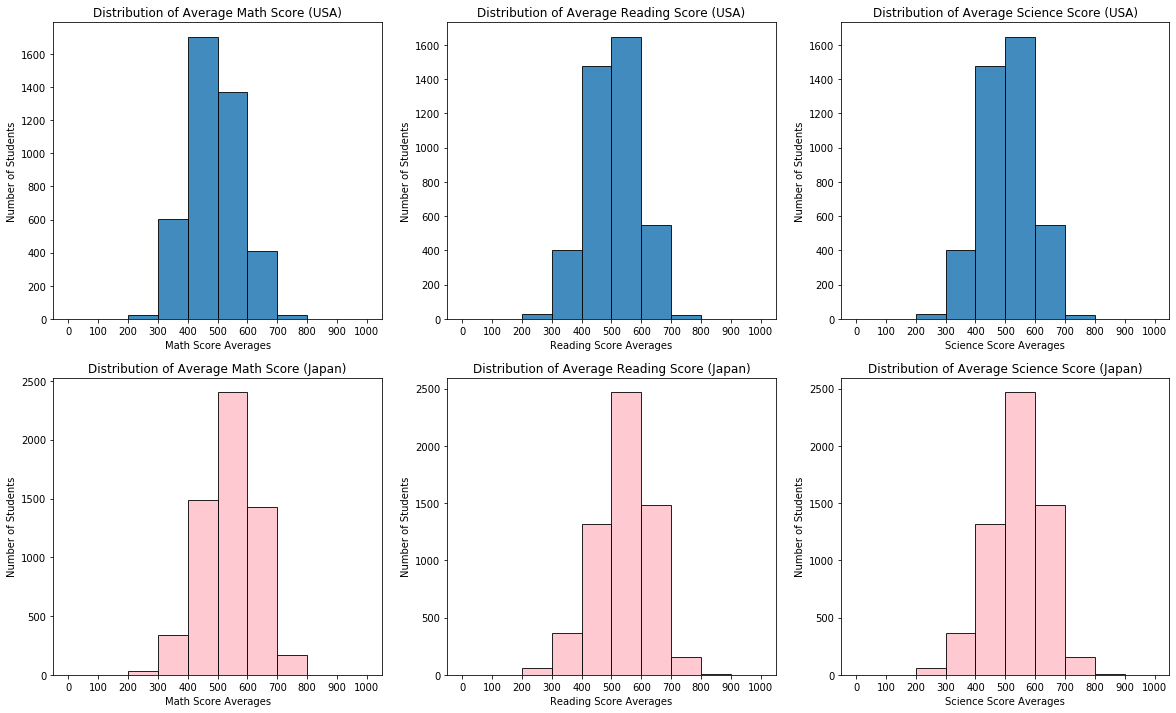

In [1045]:
plt.figure(figsize = [20, 12])

## USA

# Math score
plt.subplot(2, 3, 1)
bins_hist = np.arange(0, 1000 + 1, 100)

plt.hist(pisa_usa['math_avg'], bins = bins_hist, ec = 'black', alpha = 0.85);
plt.xticks(bins_hist)
plt.xlabel('Math Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Math Score (USA)");

# Reading score
plt.subplot(2, 3, 2)

plt.hist(pisa_usa['read_avg'], bins = bins_hist, ec = 'black', alpha = 0.85);
plt.xticks(bins_hist)
plt.xlabel('Reading Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Reading Score (USA)");

# Science score
plt.subplot(2, 3, 3)

plt.hist(pisa_usa['read_avg'], bins = bins_hist, ec = 'black', alpha = 0.85);
plt.xticks(bins_hist)
plt.xlabel('Science Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Science Score (USA)");

## Japan

# Math score
plt.subplot(2, 3, 4)
bins_hist = np.arange(0, 1000 + 1, 100)

plt.hist(pisa_japan['math_avg'], bins = bins_hist, ec = 'black', alpha = 0.85, color='pink');
plt.xticks(bins_hist)
plt.xlabel('Math Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Math Score (Japan)");

# Reading score
plt.subplot(2, 3, 5)

plt.hist(pisa_japan['read_avg'], bins = bins_hist, ec = 'black', alpha = 0.85, color='pink');
plt.xticks(bins_hist)
plt.xlabel('Reading Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Reading Score (Japan)");

# Science score
plt.subplot(2, 3, 6)

plt.hist(pisa_japan['read_avg'], bins = bins_hist, ec = 'black', alpha = 0.85, color='pink');
plt.xticks(bins_hist)
plt.xlabel('Science Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Science Score (Japan)");

Each country shows a unimodal distribution of scores.  In USA, the majority of scores fall somewhere between 400 and 500, while Japan has a more concentration of scores between 500 and 600.  Each country has a small concentration of students achieving low scores (100-200) and high scores (700-800).

Comparing the two countries, the most notable difference is between math scores.  In USA, the concentration is between 400-500 whereas in Japan it is between 500-600.

Personally, I am interested to see the correlation of scores to various factors such as time spent studying and cultural background of the student, so I will investigate that next.

## Distribution of Hours Spent Studying Outside of School

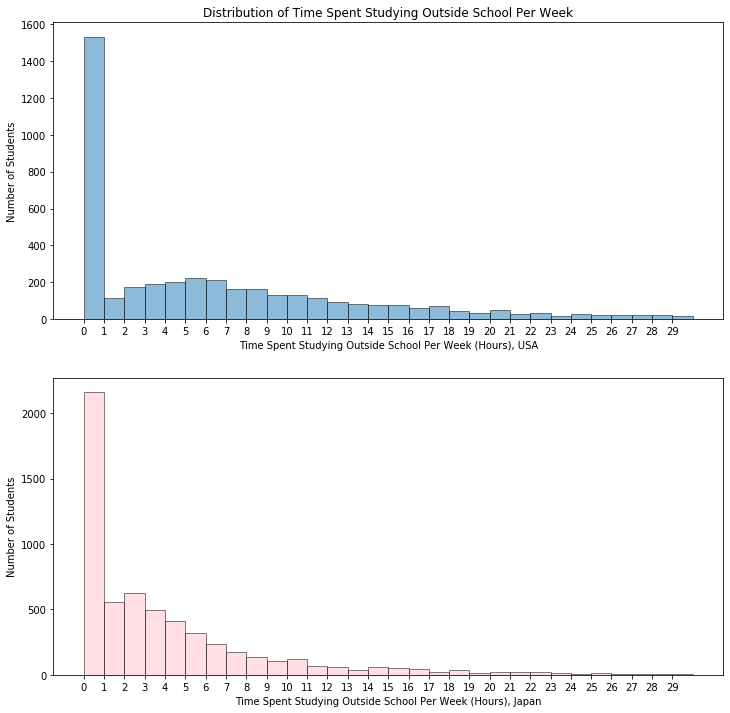

In [1046]:
# plot
plt.subplots(2, 1, sharex='col', sharey='row', figsize=(12,12))

## USA
plt.subplot(2, 1, 1)
bins_hist = np.arange(0, 30 + 1, 1)
plt.hist(data=pisa_usa, x = 'outside_study_time', bins = bins_hist, alpha = 0.5, ec='black');
plt.xticks(np.arange(0,30,1))
plt.xlabel('Time Spent Studying Outside School Per Week (Hours), USA');
plt.ylabel('Number of Students');
plt.title('Distribution of Time Spent Studying Outside School Per Week');

## Japan
plt.subplot(2, 1, 2)
bins_hist = np.arange(0, 30 + 1, 1)
plt.hist(data=pisa_japan, x = 'outside_study_time', bins = bins_hist, alpha = 0.5, ec='black', color='pink');
plt.xticks(np.arange(0,30,1));
plt.xlabel('Time Spent Studying Outside School Per Week (Hours), Japan');
plt.ylabel('Number of Students');

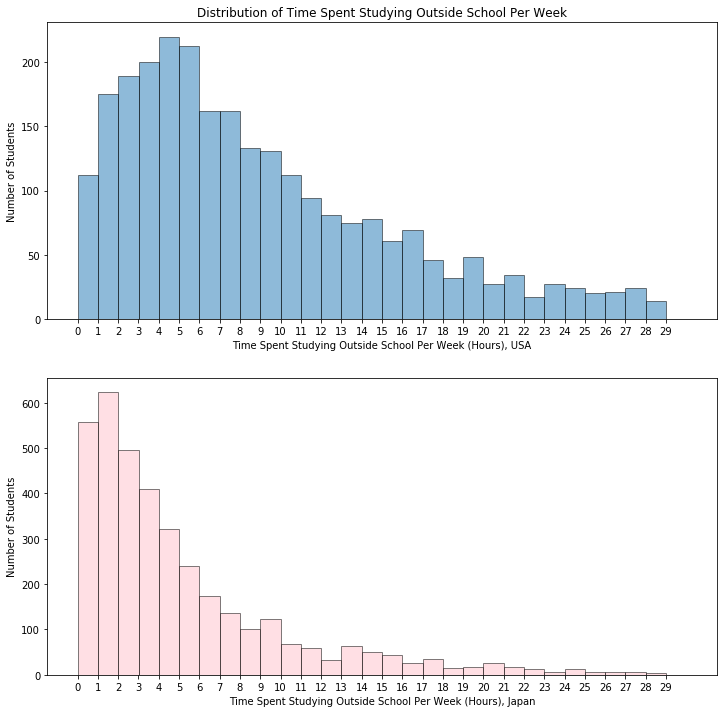

In [1047]:
# zero time spent outside is the predominant answer, so let's see the distribution
# when some time spent studying was mentioned:

plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,12))

## USA
plt.subplot(2, 1, 1)
bins_hist = np.arange(0.001, 30 + 1, 1)
plt.hist(data=pisa_usa, x = 'outside_study_time', bins = bins_hist, alpha = 0.5, ec='black');
plt.xticks(np.arange(0,30,1))
plt.xlabel('Time Spent Studying Outside School Per Week (Hours), USA');
plt.ylabel('Number of Students');
plt.title('Distribution of Time Spent Studying Outside School Per Week');

## Japan
plt.subplot(2, 1, 2)
bins_hist = np.arange(0.001, 30 + 1, 1)
plt.hist(data=pisa_japan, x = 'outside_study_time', bins = bins_hist, alpha = 0.5, ec='black', color='pink');
plt.xticks(np.arange(0,30,1))
plt.xlabel('Time Spent Studying Outside School Per Week (Hours), Japan');
plt.ylabel('Number of Students');


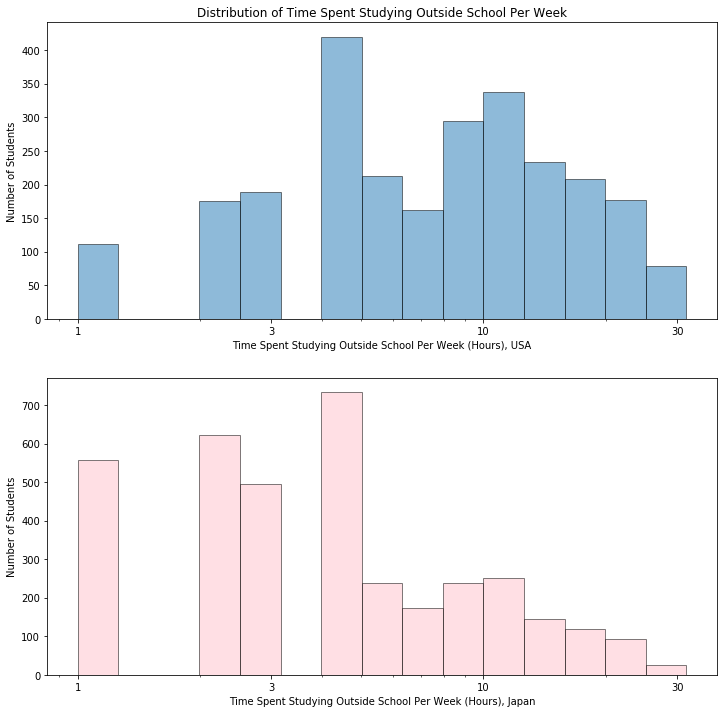

In [1048]:
# try a logarithmic plot
plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,12))

## USA
plt.subplot(2, 1, 1)
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(pisa_usa['outside_study_time'].max())+log_binsize, log_binsize)

plt.hist(data=pisa_usa, x = 'outside_study_time', bins = bins, alpha = 0.5, ec='black');
plt.xscale('log')
plt.xticks([1, 3, 10, 30], ['1', '3', '10', '30'])
plt.xlabel('Time Spent Studying Outside School Per Week (Hours), USA');
plt.ylabel('Number of Students');
plt.title('Distribution of Time Spent Studying Outside School Per Week');

## Japan
plt.subplot(2, 1, 2)
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(pisa_japan['outside_study_time'].max())+log_binsize, log_binsize)

plt.hist(data=pisa_japan, x = 'outside_study_time', bins = bins, alpha = 0.5, ec='black', color='pink');
plt.xscale('log')
plt.xticks([1, 3, 10, 30], ['1', '3', '10', '30'])
plt.xlabel('Time Spent Studying Outside School Per Week (Hours), Japan');
plt.ylabel('Number of Students');

On the whole, the initial chart shows that the majority of students report that they do not spend any time outside of school for studying. Filtering down to entries where there is some amount of time spent studying outside of school reported creates a chart that is easier to read. I also created a logarithmic chart due to the long tail in USA, but the chart generally seems to convey the same information as the linear chart.

Some observations from the charts:

USA:
The distribution appears unimodal with heavy skew to the right and a long tail.  The time spent studying outside of school appears to peak around 6-7 hours.

Japan:
The distribution appears unimodal with heavy skew to the right and a long tail.  The time spent studying outside of school appears to peak around 1-2 hours.

It is interesting to see that there is wider distribution of time spent outside school in the US than Japan. I imagined Japan would have had much wider distribution of time spent outside school.

It would be interesting to see how this factor correlates with the average scores.

## Bivariate Exploration

### Study Time versus Score

My first interest is to see if there is any interesting insights from exploring study time data and score data.  
Since there is a lot of data, I chose to go with a heatmap.

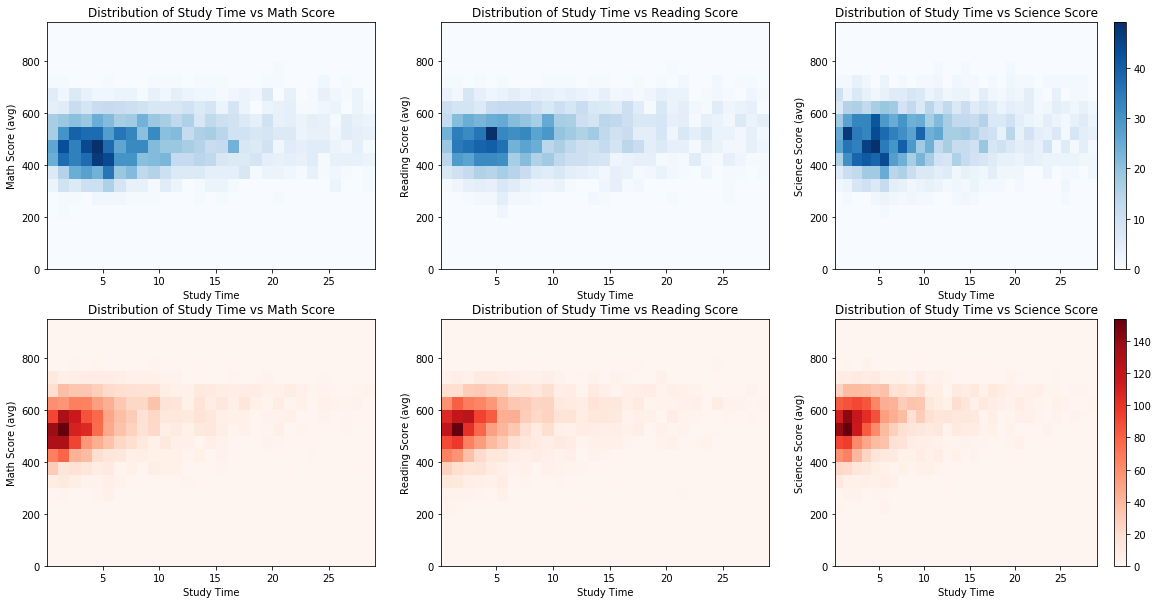

In [1049]:
plt.subplots(2, 3, sharex='col', sharey='row', figsize=(20,10))

## USA

# chart heatmap between study time and average scores
plt.subplot(2, 3, 1)
bins_x = np.arange(0.1, 30, 1)
bins_y = np.arange(0, 1000, 50)

plt.hist2d(data = pisa_usa, x = 'outside_study_time', y = 'math_avg',
          bins = [bins_x, bins_y], cmap='Blues')
plt.xlabel('Study Time');
plt.ylabel('Math Score (avg)');
plt.title('Distribution of Study Time vs Math Score');

# chart heatmap between study time and average score
plt.subplot(2, 3, 2)

plt.hist2d(data = pisa_usa, x = 'outside_study_time', y = 'read_avg',
          bins = [bins_x, bins_y], cmap='Blues')
plt.xlabel('Study Time');
plt.ylabel('Reading Score (avg)');
plt.title('Distribution of Study Time vs Reading Score');

# chart heatmap between study time and average score
plt.subplot(2, 3, 3)

plt.hist2d(data = pisa_usa, x = 'outside_study_time', y = 'scie_avg',
          bins = [bins_x, bins_y], cmap='Blues')
plt.xlabel('Study Time');
plt.ylabel('Science Score (avg)');
plt.title('Distribution of Study Time vs Science Score');
plt.colorbar();

## Japan

# chart heatmap between study time and average scores
plt.subplot(2, 3, 4)

plt.hist2d(data = pisa_japan, x = 'outside_study_time', y = 'math_avg',
          bins = [bins_x, bins_y], cmap='Reds')
plt.xlabel('Study Time');
plt.ylabel('Math Score (avg)');
plt.title('Distribution of Study Time vs Math Score');

# chart heatmap between study time and average score
plt.subplot(2, 3, 5)

plt.hist2d(data = pisa_japan, x = 'outside_study_time', y = 'read_avg',
          bins = [bins_x, bins_y], cmap='Reds')
plt.xlabel('Study Time');
plt.ylabel('Reading Score (avg)');
plt.title('Distribution of Study Time vs Reading Score');

# chart heatmap between study time and average score
plt.subplot(2, 3, 6)

plt.hist2d(data = pisa_japan, x = 'outside_study_time', y = 'scie_avg',
          bins = [bins_x, bins_y], cmap='Reds')
plt.xlabel('Study Time');
plt.ylabel('Science Score (avg)');
plt.title('Distribution of Study Time vs Science Score');
plt.colorbar();

The heat chart suggests that the most students in both countries generally spend around 5 hours of outside study per week, and scores between the 400 and 600 mark.

There seem to be slightly positive correlation between study time and average scores, indicate by the "up and to the right" diagonal shape of the heatmap.  This is more acutely visible in the Japan dataset.

## Language Spoken at Home vs Reading Score

Another topic I'm interested in seeing the correlation between families who speak an international language at home versus the native language, and if that has any correlation to reading scores.

In this case, I'll only observe the US dataset since Japan is a relatively monolingual nation.

In [1110]:
pisa_sub.intl_language_at_home.value_counts()

Language of the test    361592
Other language           50687
Name: intl_language_at_home, dtype: int64

In [1111]:
# remove missing variables first
intnl_lang_at_home = pisa_usa[pisa_usa['intl_language_at_home'] != "Missing"]

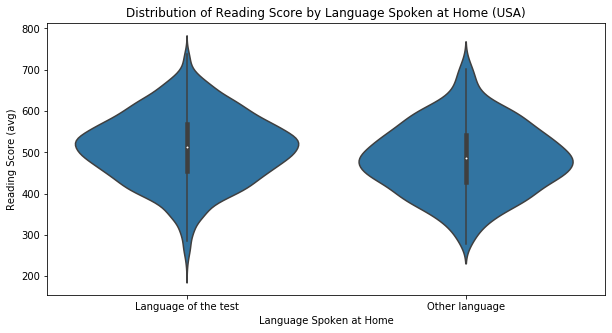

In [1112]:
# create violin plot
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,5))
sb.violinplot(data = intnl_lang_at_home, x = 'intl_language_at_home', y = 'read_avg',
              color = base_color);
plt.title('Distribution of Reading Score by Language Spoken at Home (USA)');
plt.xlabel('Language Spoken at Home');
plt.ylabel('Reading Score (avg)');

As imagined, students who speaks a different language at home than the language tested generally has lower distribution of scores compared to those who speak the language of the test at home.

Those who speak the language of the test at home generally peak around 500 and 550, while those who speak another language at home peak around 450 and 500.

## Multivariate Exploration

### Correlation of Scores

The first point of analysis I'd like to do is to see whether having a high score on one test positively correlates to having high scores on another test.  In this case, 

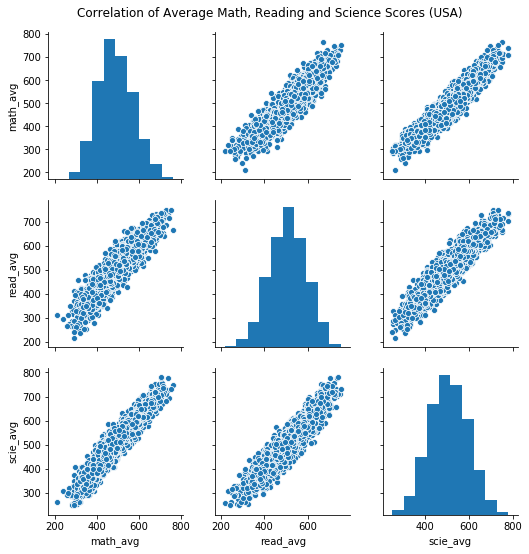

In [1053]:
# create a plot matrix
grid_usa = sb.pairplot(data = pisa_usa, vars=["math_avg", "read_avg", "scie_avg"]);
grid_usa.fig.suptitle("Correlation of Average Math, Reading and Science Scores (USA)", y = 1.02);

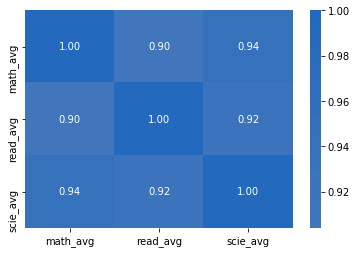

In [1054]:
# create a correlation matrix
pisa_usa_scores = pisa_usa[['math_avg','read_avg','scie_avg']]
sb.heatmap(pisa_usa_scores.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

The data show the expected outcome, where there is a strong correlation between any pair of test score averages.  This is further evidenced by the correlation matrix, where all variable pairs have a correlation above 0.9.

### Correlation of Family Structure and Scores
Let's explore the correlation of family structure versus test scores.

<Figure size 1440x720 with 0 Axes>

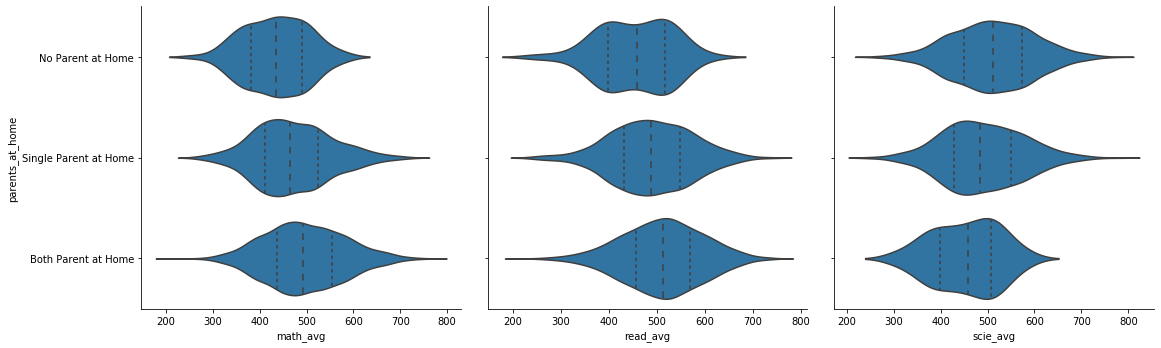

In [1115]:
plt.figure(figsize=(20,10));
variables = ['Both Parent at Home', 'Single Parent at Home', 'No Parent at Home'];
g = sb.PairGrid(data = pisa_usa, x_vars = ['math_avg','read_avg','scie_avg'],
                y_vars = ['parents_at_home'], height = 5);
g.map(sb.violinplot, inner = 'quartile', order = variables);

Using a pairplot function, the chart shows that the median distribution is higher for students where both parents are at home versus single parent or no parent for math and reading scores.  Interestingly, the opposite appears to be true for science scores, where students with no parents at home has a higher median score.